## I

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
	
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


train = pd.read_csv("../datasets/insurance_train.csv")
test = pd.read_csv("../datasets/insurance_test.csv")

train.head()

,age,sex,bmi,children,smoker,region,charges
0,26,male,27.060,0,yes,southeast,17043.34140
1,58,male,36.955,2,yes,northwest,47496.49445
2,20,female,24.420,0,yes,southeast,26125.67477
3,51,female,38.060,0,yes,southeast,44400.40640
4,62,female,25.000,0,no,southwest,13451.12200


In [2]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       338 non-null    int64  
 1   sex       338 non-null    object 
 2   bmi       338 non-null    float64
 3   children  338 non-null    int64  
 4   smoker    338 non-null    object 
 5   region    338 non-null    object 
 6   charges   338 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 18.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(

In [3]:
# Пропуски
print(train.isnull().sum())
print(test.isnull().sum())


print(train.describe())
print(test.describe())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
              age         bmi    children       charges
count  338.000000  338.000000  338.000000    338.000000
mean    38.810651   30.672751    1.153846  14092.861924
std     13.637734    6.309709    1.205822  12792.472722
min     18.000000   17.290000    0.000000   1121.873900
25%     27.000000   26.053750    0.000000   4811.304137
50%     38.000000   30.065000    1.000000   9891.530425
75%     50.000000   34.595000    2.000000  19423.699050
max     64.000000   53.130000    5.000000  63770.428010
               age          bmi     children       charges
count  1000.000000  1000.000000  1000.000000   1000.000000
mean     39.341000    30.660235     1.075000  12992.437660
std      14.190775     6.028243     1.205333  11864.228619
min      18.000000    15.960000     0.

In [7]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    mask = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
    return df[mask]

print("\nРазмер до очистки:", len(train))
train = remove_outliers_iqr(train, 'charges')
print("Размер после очистки:", len(train))


Размер до очистки: 338
Размер после очистки: 319


In [9]:
train_encoded = pd.get_dummies(train, columns=['sex','smoker','region'], drop_first=True)
test_encoded = pd.get_dummies(test, columns=['sex','smoker','region'], drop_first=True)

In [11]:
# Совпадение колонок
for col in train_encoded.columns:
    if col not in test_encoded.columns:
        test_encoded[col] = 0
for col in test_encoded.columns:
    if col not in train_encoded.columns:
        train_encoded[col] = 0

# Сортировка по колонкам
train_encoded = train_encoded.sort_index(axis=1)
test_encoded = test_encoded[train_encoded.columns]


In [13]:
train_encoded = train_encoded.astype(float)
test_encoded = test_encoded.astype(float)

In [15]:
train_encoded

,age,bmi,charges,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,26.0,27.060,17043.34140,0.0,0.0,1.0,0.0,1.0,1.0
2,20.0,24.420,26125.67477,0.0,0.0,1.0,0.0,0.0,1.0
4,62.0,25.000,13451.12200,0.0,0.0,0.0,1.0,0.0,0.0
5,34.0,32.800,14358.36437,1.0,0.0,0.0,1.0,1.0,0.0
6,18.0,33.770,1725.55230,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
332,26.0,32.490,3490.54910,1.0,0.0,0.0,0.0,1.0,0.0
333,25.0,22.515,3594.17085,1.0,1.0,0.0,0.0,0.0,0.0
334,18.0,53.130,1163.46270,0.0,0.0,1.0,0.0,1.0,0.0
335,64.0,37.905,14210.53595,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
test_encoded

,age,bmi,charges,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,61.0,38.380,12950.07120,0.0,1.0,0.0,0.0,1.0,0.0
1,59.0,34.800,36910.60803,2.0,0.0,0.0,1.0,0.0,0.0
2,31.0,30.875,3857.75925,0.0,0.0,0.0,0.0,1.0,0.0
3,24.0,33.345,2855.43755,0.0,1.0,0.0,0.0,0.0,0.0
4,31.0,28.500,6799.45800,5.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
995,42.0,24.985,8017.06115,2.0,1.0,0.0,0.0,0.0,0.0
996,50.0,46.090,9549.56510,1.0,0.0,1.0,0.0,0.0,0.0
997,20.0,21.800,20167.33603,0.0,0.0,0.0,1.0,0.0,1.0
998,32.0,44.220,3994.17780,0.0,0.0,1.0,0.0,0.0,0.0


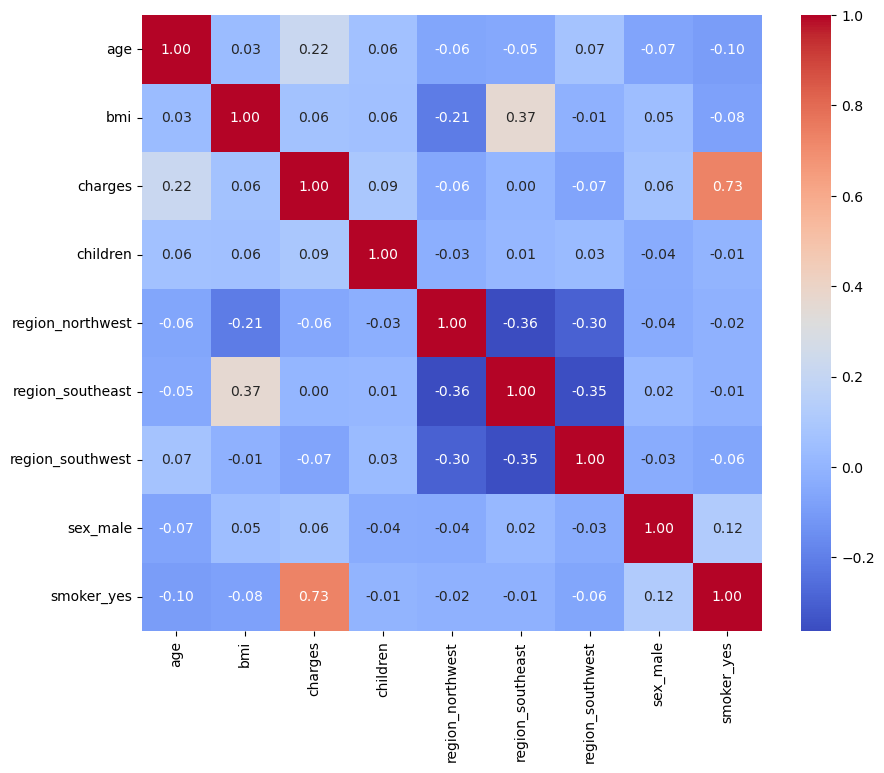

In [19]:
corr_matrix = train_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## II

In [22]:
X_train = train_encoded.drop("charges", axis=1).to_numpy()
Y_train = train_encoded["charges"].to_numpy()
X_test = test_encoded.drop("charges", axis=1).to_numpy()
Y_test = test_encoded["charges"].to_numpy()
feature_names = ["bias"] + list(test_encoded.drop("charges", axis=1).columns)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


In [24]:
# 2.1 Аналитически
w_analytic = np.linalg.pinv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ Y_train
print("\n----- Линейная регрессия (аналитическая) -----")
for name, coef in zip(feature_names, w_analytic):
    print(f"{name}: {coef:.2f}")


----- Линейная регрессия (аналитическая) -----
bias: 12138.53
age: 2869.21
bmi: 1259.78
children: 746.61
region_northwest: -401.00
region_southeast: -573.56
region_southwest: -738.90
sex_male: -163.71
smoker_yes: 7744.28


In [26]:
W_full = np.zeros(X_train_bias.shape[1])
lr = 1e-2
n_steps = 10000

for _ in range(n_steps):
    y_pred = X_train_bias @ W_full
    grad = 2 * (X_train_bias.T @ (y_pred - Y_train)) / X_train_bias.shape[0]
    W_full -= lr * grad

print("\n----- Линейная регрессия (градиентный спуск) -----")
for name, coef in zip(feature_names, W_full):
    print(f"{name}: {coef:.2f}")
 


----- Линейная регрессия (градиентный спуск) -----
bias: 12138.53
age: 2869.21
bmi: 1259.78
children: 746.61
region_northwest: -401.00
region_southeast: -573.56
region_southwest: -738.90
sex_male: -163.71
smoker_yes: 7744.28


## III

In [46]:
alpha = 0.01
n_features = X_train.shape[1]
I = np.eye(n_features + 1)
I[0, 0] = 0  
theta_ridge = np.linalg.pinv(X_train_bias.T @ X_train_bias + alpha * I) @ X_train_bias.T @ Y_train
print("\n----- Ridge регрессия (аналитическая) -----")
for name, coef in zip(feature_names, theta_ridge):
    print(f"{name}: {coef:.2f}")


----- Ridge регрессия (аналитическая) -----
bias: 12138.53
age: 2869.10
bmi: 1259.70
children: 746.60
region_northwest: -400.98
region_southeast: -573.50
region_southwest: -738.86
sex_male: -163.68
smoker_yes: 7744.02


In [57]:
alpha = 0.1
lr = 1e-3
n_steps = 90000

W_ridge = np.zeros(X_train_bias.shape[1])
lr_ridge = 1e-3
for _ in range(n_steps):
    y_pred = X_train_bias @ W_ridge
    grad = 2 * (X_train_bias.T @ (y_pred - Y_train)) / X_train_bias.shape[0]
    grad[1:] += 2 * alpha * W_ridge[1:]
    W_ridge -= lr_ridge * grad

print("\n----- Ridge регрессия (градиентный спуск) -----")
for name, coef in zip(feature_names, W_ridge):
    print(f"{name}: {coef:.2f}")



----- Ridge регрессия (градиентный спуск) -----
bias: 12138.53
age: 2560.29
bmi: 1062.55
children: 701.61
region_northwest: -355.35
region_southeast: -432.80
region_southwest: -636.85
sex_male: -76.83
smoker_yes: 6997.42


## IV

In [59]:
y_mean = np.mean(Y_train)
y_pred_const = np.ones_like(Y_test) * y_mean
mse_const = mean_squared_error(Y_test, y_pred_const)
print(f"\nMSE константной модели: {mse_const:.2f}")

# Линейная регрессия
y_pred_linear_analytic = X_test_bias @ w_analytic
y_pred_linear_sgd = X_test_bias @ W_full
mse_linear_analytic = mean_squared_error(Y_test, y_pred_linear_analytic)
mse_linear_sgd = mean_squared_error(Y_test, y_pred_linear_sgd)
print(f"MSE линейной модели (аналитически): {mse_linear_analytic:.2f}")
print(f"MSE линейной модели (градиентный спуск): {mse_linear_sgd:.2f}")

# Ridge регрессия
y_pred_ridge_analytic = X_test_bias @ theta_ridge
y_pred_ridge_sgd = X_test_bias @ W_ridge
mse_ridge_analytic = mean_squared_error(Y_test, y_pred_ridge_analytic)
mse_ridge_sgd = mean_squared_error(Y_test, y_pred_ridge_sgd)
print(f"MSE Ridge модели (аналитически): {mse_ridge_analytic:.2f}")
print(f"MSE Ridge модели (градиентный спуск): {mse_ridge_sgd:.2f}")


MSE константной модели: 141348319.77
MSE линейной модели (аналитически): 37693284.09
MSE линейной модели (градиентный спуск): 37693284.09
MSE Ridge модели (аналитически): 37694342.02
MSE Ridge модели (градиентный спуск): 41449411.23
